In [1]:
import os
import sys
import re
import json
from datasets import (load_dataset, 
    load_from_disk,
    Dataset,
    DatasetDict,
    Value,
    Features
)

In [2]:
from pykospacing import Spacing

2021-12-01 03:15:19.511641: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-12-01 03:15:20.925905: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-12-01 03:15:20.933484: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-01 03:15:20.933950: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:05.0 name: Tesla V100-PCIE-32GB computeCapability: 7.0
coreClock: 1.38GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2021-12-01 03:15:20.933991: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-12-01 03:15:20.937101: I tensorflow/stream_executor/plat

In [3]:
import torch
import random
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt

In [4]:
from transformers import AutoTokenizer
from tqdm.notebook import tqdm

## Law Dataset

In [137]:
law_dataset = load_dataset('metamong1/summarization_law', 
    use_auth_token='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')

Reusing dataset law_summarization (/opt/ml/.cache/huggingface/datasets/metamong1___law_summarization/Paper Summarization/1.0.0/b4c21f8e9a8211bbebe7437284997af95e8611d886449a66836e0b76b444ceb9)


  0%|          | 0/2 [00:00<?, ?it/s]

In [138]:
law_dataset

DatasetDict({
    train: Dataset({
        features: ['doc_id', 'title', 'text', 'doc_type', 'file'],
        num_rows: 23730
    })
    validation: Dataset({
        features: ['doc_id', 'title', 'text', 'doc_type', 'file'],
        num_rows: 5933
    })
})

In [139]:
for i in range(10) :
    print(law_dataset['train'][i]['title'])

보험금
기성금
군장학생사퇴거부처분취소
등기공무원의처분에대한이의
손해배상(기)
소유권확인
소유권이전등기
손해배상(기)
유류분반환
일부영업정지처분취소


In [7]:
train_data = list(law_dataset['train'])
val_data = list(law_dataset['validation'])

In [8]:
spacing = Spacing()

In [9]:
def space_title(dataset) :
    for data in tqdm(dataset) :
        title = data['title']
        title = spacing(title)
        data['title'] = title
    return dataset

In [129]:
with open('../Data/train_data.json', 'r') as f :
    train_data = json.load(f)

In [131]:
space_titles = [data['title'] for data in train_data]

In [132]:
space_titles[:10]

['보험금',
 '기성금',
 '군 장학생 사퇴 거부 처분 취소',
 '등기공무원의 처분에 대한 이의',
 '손해배상(기)',
 '소유권 확인',
 '소유권 이전 등기',
 '손해배상(기)',
 '유류분 반환',
 '일부 영업정지 처분 취소']

In [10]:
train_data = space_title(train_data)

  0%|          | 0/23730 [00:00<?, ?it/s]

2021-12-01 01:26:38.320572: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-12-01 01:26:38.321115: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2200050000 Hz


In [15]:
with open('../Data/train_data.json', 'w') as f :
    json.dump(train_data,f)

In [16]:
val_data = space_title(val_data)

  0%|          | 0/5933 [00:00<?, ?it/s]

In [17]:
with open('../Data/val_data.json', 'w') as f :
    json.dump(val_data,f)

In [19]:
train_docs = []
train_titles = []

for data in tqdm(train_data) :
    train_docs.append(data['text'])
    train_titles.append(data['title'])

  0%|          | 0/23730 [00:00<?, ?it/s]

## Magazine

In [70]:
magazine_dataset = law_dataset = load_dataset('metamong1/summarization_magazine', 
    use_auth_token='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')

Reusing dataset magazine_summarization (/opt/ml/.cache/huggingface/datasets/metamong1___magazine_summarization/Paper Summarization/1.0.0/5b81b93a1c6d5d23211143f0284ad83464ec95f399145aa658f1c8c827c972d9)


  0%|          | 0/2 [00:00<?, ?it/s]

In [74]:
magazine_dataset

DatasetDict({
    train: Dataset({
        features: ['doc_id', 'title', 'text', 'doc_type', 'file'],
        num_rows: 52691
    })
    validation: Dataset({
        features: ['doc_id', 'title', 'text', 'doc_type', 'file'],
        num_rows: 13173
    })
})

In [72]:
train_data = magazine_dataset['train']

In [73]:
train_docs = []
train_titles = []

for data in tqdm(train_data) :
    train_docs.append(data['text'])
    train_titles.append(data['title'])

  0%|          | 0/52691 [00:00<?, ?it/s]

## News

In [85]:
news_dataset = law_dataset = load_dataset('metamong1/summarization_news', 
    use_auth_token='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')

Downloading:   0%|          | 0.00/2.63k [00:00<?, ?B/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset news_summarization downloaded and prepared to /opt/ml/.cache/huggingface/datasets/metamong1___news_summarization/Paper Summarization/1.0.0/18fd0218f0c6f25cfdf46f05f2906886aeeb617bd764bd9fb1b9260c32474e29. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [86]:
news_dataset

DatasetDict({
    train: Dataset({
        features: ['doc_id', 'title', 'text', 'doc_type', 'file'],
        num_rows: 240628
    })
    validation: Dataset({
        features: ['doc_id', 'title', 'text', 'doc_type', 'file'],
        num_rows: 60157
    })
})

In [87]:
train_data = news_dataset['train']

In [88]:
train_docs = []
train_titles = []

for data in tqdm(train_data) :
    train_docs.append(data['text'])
    train_titles.append(data['title'])

  0%|          | 0/240628 [00:00<?, ?it/s]

## Preprocessing

In [7]:
from abc import *

In [8]:
class Preprocessor(metaclass=ABCMeta) :
    def __init__(self ) :
        # 일본어, 한국어, 한자, 기본 문자, 구두점, 문장 기호
        self.outrange_comp = re.compile('[^\u3040-\u30ff\
            \uac00-\ud7af\
            \uac00-\ud7af\
            \u4e00-\u9fff\
            \u0000-\u007f\
            \u2000-\u206f\
            \u25a0-\u25ff]') 

    @abstractmethod
    def for_train(self, data) :
        pass

    @abstractmethod
    def for_test(self, data) :
        pass

    def strip(self, txt) :
        txt = re.sub('\s+' , ' ', txt) 
        return txt.strip()

    def check_keys(self, data) :
        if 'text' not in data.keys() or 'title' not in data.keys() :
            raise KeyError('Wrong Data keys')

    def doc_preprocess(self, txt) :
        txt = self.outrange_comp.sub(' ', txt)
        return txt

In [9]:
class DocsPreprocessor(Preprocessor) :
    def __init__(self) :
        super().__init__()

    def base_preprocess(self, text) :
        text = re.sub('\"\"', ' ', text)
        text = re.sub(r'\n', ' ', text)
        text = re.sub('[▶▲△]', ', ', text)
        return text

    def for_train(self, data) :
        self.check_keys(data)
        title = data['title'] # title preprocessing
        title = self.base_preprocess(title)
        title = self.doc_preprocess(title)
        title = self.strip(title)

        text = data['text'] # text preprocessing
        text = self.base_preprocess(text)
        text = self.doc_preprocess(text)
        text = self.strip(text)

        data['text'] = text 
        data['title'] = title
        return data

    def for_test(self, data) :
        self.check_keys(data)
        text = data['text']
        text = self.base_preprocess(text)
        text = self.doc_preprocess(text)
        text = self.strip(text)
        data['text'] = text 
        return data


In [10]:
preprocessor = DocsPreprocessor()

## Tokenizer

In [21]:
tokenizer = AutoTokenizer.from_pretrained('klue/roberta-large')

In [22]:
law_dataset = load_dataset('metamong1/summarization_law', 
    use_auth_token='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')

law_dataset = law_dataset.map(preprocessor.for_train)
law_dataset = law_dataset['train']

Reusing dataset law_summarization (/opt/ml/.cache/huggingface/datasets/metamong1___law_summarization/Paper Summarization/1.0.0/b4c21f8e9a8211bbebe7437284997af95e8611d886449a66836e0b76b444ceb9)


  0%|          | 0/2 [00:00<?, ?it/s]

Parameter 'function'=<function DocsPreprocessor.for_train at 0x7fab7c3f8040> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


  0%|          | 0/23730 [00:00<?, ?ex/s]

  0%|          | 0/5933 [00:00<?, ?ex/s]

In [23]:
magazine_dataset = load_dataset('metamong1/summarization_magazine', 
    use_auth_token='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')

magazine_dataset = magazine_dataset.map(preprocessor.for_train)
magazine_dataset = magazine_dataset['train']

Reusing dataset magazine_summarization (/opt/ml/.cache/huggingface/datasets/metamong1___magazine_summarization/Paper Summarization/1.0.0/5b81b93a1c6d5d23211143f0284ad83464ec95f399145aa658f1c8c827c972d9)


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/52691 [00:00<?, ?ex/s]

  0%|          | 0/13173 [00:00<?, ?ex/s]

In [24]:
news_dataset = load_dataset('metamong1/summarization_news', 
    use_auth_token='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')

news_dataset = news_dataset.map(preprocessor.for_train)
news_dataset = news_dataset['train']

Reusing dataset news_summarization (/opt/ml/.cache/huggingface/datasets/metamong1___news_summarization/Paper Summarization/1.0.0/18fd0218f0c6f25cfdf46f05f2906886aeeb617bd764bd9fb1b9260c32474e29)


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/240628 [00:00<?, ?ex/s]

  0%|          | 0/60157 [00:00<?, ?ex/s]

In [25]:
law_docs = [data['text'] for data in law_dataset]
magazine_docs = [data['text'] for data in magazine_dataset]
news_docs = [data['text'] for data in news_dataset]

## UNK Token

In [26]:
law_unk_counts = []

In [27]:
for doc in tqdm(law_docs) :
    ids = tokenizer.encode(doc)
    unk_vector = (np.array(ids) == tokenizer.unk_token_id).astype('float')
    count = np.sum(unk_vector)
    law_unk_counts.append(count)

  0%|          | 0/23730 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (922 > 512). Running this sequence through the model will result in indexing errors


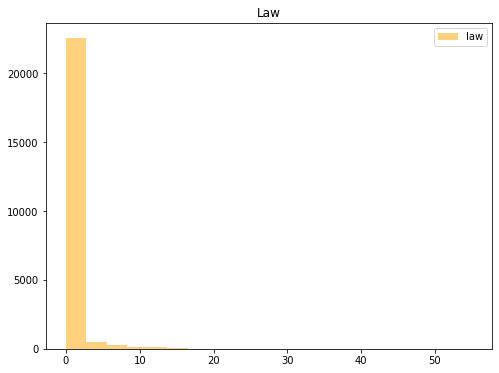

In [32]:
plt.figure(figsize = (8,6))
plt.title('Law')
plt.hist(law_unk_counts, bins=20, color='orange', label='law', alpha=0.5)
plt.legend()
plt.show()

In [29]:
magazine_unk_counts = []

In [30]:
for doc in tqdm(magazine_docs) :
    ids = tokenizer.encode(doc)
    unk_vector = (np.array(ids) == tokenizer.unk_token_id).astype('float')
    count = np.sum(unk_vector)
    magazine_unk_counts.append(count)

  0%|          | 0/52691 [00:00<?, ?it/s]

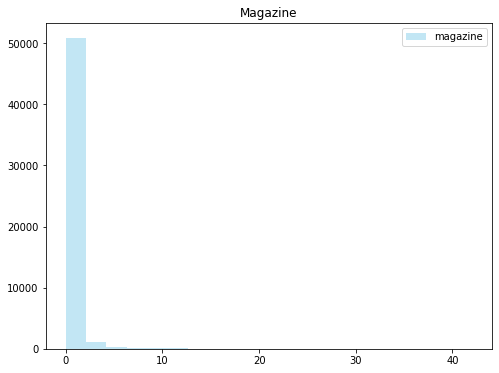

In [36]:
plt.figure(figsize = (8,6))
plt.title('Magazine')
plt.hist(magazine_unk_counts, bins=20, color='skyblue', label='magazine', alpha=0.5)
plt.legend()
plt.show()

In [33]:
news_unk_counts = []

In [34]:
for doc in tqdm(news_docs) :
    ids = tokenizer.encode(doc)
    unk_vector = (np.array(ids) == tokenizer.unk_token_id).astype('float')
    count = np.sum(unk_vector)
    news_unk_counts.append(count)

  0%|          | 0/240628 [00:00<?, ?it/s]

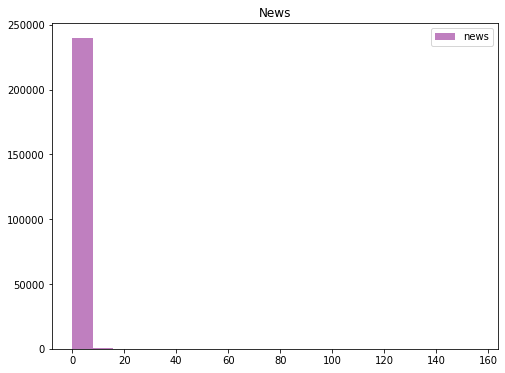

In [35]:
plt.figure(figsize = (8,6))
plt.title('News')
plt.hist(news_unk_counts, bins=20, color='purple', label='news', alpha=0.5)
plt.legend()
plt.show()